In [1]:
!pip install tensorflow
!pip install Pillow
!pip install scipy

import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir parâmetros
img_width, img_height = 224, 224  
batch_size = 32  
epochs = 30  


train_dir = 'lemon_dataset/dataSet'
validation_dir = 'lemon_dataset/validation_lemon'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  
)


base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
for layer in base_model.layers:
    layer.trainable = False

model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # 1 neurônio e 'sigmoid' para classificação binária
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Alterado para 'binary_crossentropy' para classificação binária
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)



Found 2076 images belonging to 2 classes.
Found 91 images belonging to 1 classes.
Epoch 1/30


C:\Users\Aula\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 66s 931ms/step - accuracy: 0.7886 - loss: 0.6138 - val_accuracy: 0.5312 - val_loss: 2.9540
Epoch 2/30
 1/64 ━━━━━━━━━━━━━━━━━━━━ 37s 593ms/step - accuracy: 1.0000 - loss: 0.0193

C:\Users\Aula\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0193 - val_accuracy: 0.5185 - val_loss: 3.0190
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 61s 913ms/step - accuracy: 0.9922 - loss: 0.0319 - val_accuracy: 0.5625 - val_loss: 3.5417
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.4074 - val_loss: 5.1770
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 64s 954ms/step - accuracy: 0.9942 - loss: 0.0225 - val_accuracy: 0.5156 - val_loss: 4.3936
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9688 - loss: 0.0442 - val_accuracy: 0.5556 - val_loss: 3.3979
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 62s 918ms/step - accuracy: 0.9845 - loss: 0.0428 - val_accuracy: 0.5156 - val_loss: 4.3494
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.5556 - val_loss: 3.6795
Epoch 9/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 61s 907ms/step - accuracy: 0.9899 - loss: 0.0236 - val_accuracy: 0.5312 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


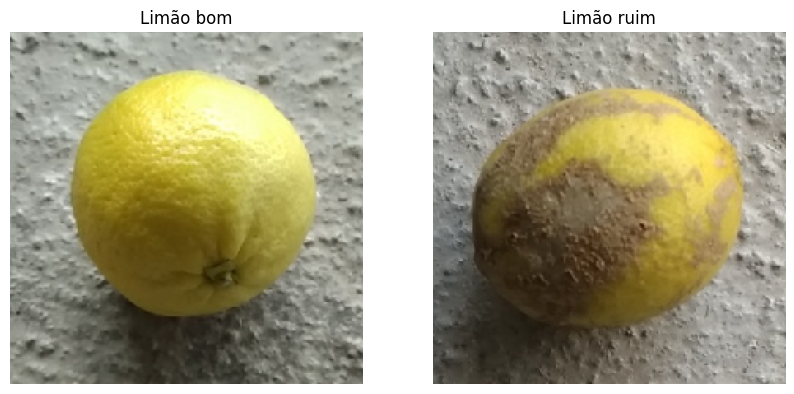

In [2]:
!pip install matplotlib


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os



img_width, img_height = 224, 224  


img_path2 = 'lemon_dataset/dataSet/bad_quality/bad_quality_0.jpg'
img_path1 = 'lemon_dataset/dataSet/good_quality/good_quality_100.jpg'


img1 = image.load_img(img_path1, target_size=(img_width, img_height))
img2 = image.load_img(img_path2, target_size=(img_width, img_height))

img_array1 = image.img_to_array(img1)
img_array2 = image.img_to_array(img2)

img_array1 = np.expand_dims(img_array1, axis=0)
img_array2 = np.expand_dims(img_array2, axis=0)

img_array1 = img_array1 / 255.0
img_array2 = img_array2 / 255.0

prediction1 = model.predict(img_array1)
prediction2 = model.predict(img_array2)

predicted_class1 = 1 if prediction1[0][0] > 0.5 else 0
predicted_class2 = 1 if prediction2[0][0] > 0.5 else 0


if predicted_class1 == 1:
    class_label1 = "Limão bom"
else:
    class_label1 = "Limão ruim"

if predicted_class2 == 1:
    class_label2 = "Limão bom"
else:
    class_label2 = "Limão ruim"


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title(class_label1)
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title(class_label2)
plt.axis('off')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


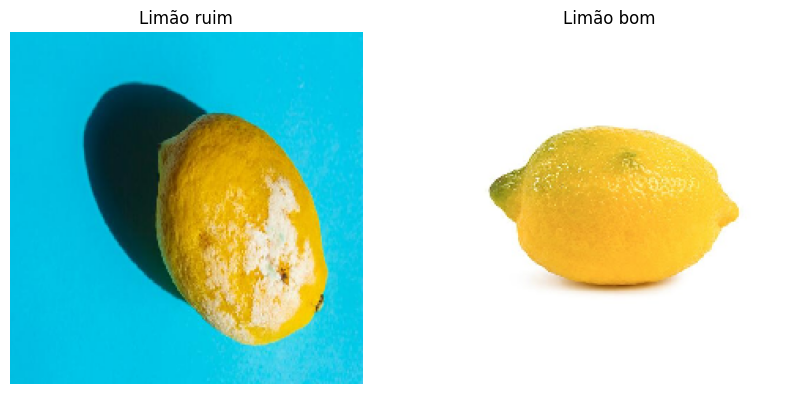

In [5]:
!pip install matplotlib


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os



img_width, img_height = 224, 224  


img_path2 = 'limao-amarelo.jpg'
img_path1 = 'limao-ruim.jpg'


img1 = image.load_img(img_path1, target_size=(img_width, img_height))
img2 = image.load_img(img_path2, target_size=(img_width, img_height))


img_array1 = image.img_to_array(img1)
img_array2 = image.img_to_array(img2)


img_array1 = np.expand_dims(img_array1, axis=0)
img_array2 = np.expand_dims(img_array2, axis=0)


img_array1 = img_array1 / 255.0
img_array2 = img_array2 / 255.0


prediction1 = model.predict(img_array1)
prediction2 = model.predict(img_array2)


predicted_class1 = 1 if prediction1[0][0] > 0.5 else 0
predicted_class2 = 1 if prediction2[0][0] > 0.5 else 0


if predicted_class1 == 1:
    class_label1 = "Limão bom"
else:
    class_label1 = "Limão ruim"

if predicted_class2 == 1:
    class_label2 = "Limão bom"
else:
    class_label2 = "Limão ruim"


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title(class_label1)
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title(class_label2)
plt.axis('off')

plt.show()